In [72]:
# Importing the neccessary libraries.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [73]:
# Loading the dataset

df_baseball = pd.read_csv('baseball.csv')
df_baseball

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [74]:
# Let's see the columns.

df_baseball.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

Features of this dataset :
    
    W -- WIN  (Target Variable)
    R -- Runs
    AB -- At Bats
    H -- Hits
    2B -- Doubles
    3B -- Triples
    HR -- Homeruns
    BB -- Walks
    SO -- Strikeouts
    SB -- Stolen Bases
    RA -- Runs Allowed
    ER -- Earned Runs
    ERA -- Earned Run Average
    SHO -- Shutouts
    SV -- Saves
    E -- Errors
    
There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 

In [75]:
# Let's check the shape of the dataset.

df_baseball.shape

(30, 17)

The dataset containts total 30 rows and total 17 features including the target variable.

In [76]:
# Let's check the data type of each variable.

df_baseball.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

All variables are of "int64" type except "ERA" which is  of "float64" type.

In [77]:
# Let's check the statistical summary of the dataset

df_baseball.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


OBSERVATIONS :
    
    1. There is a variety of range within the variables eg. the range of "CG", "ERA", "SHO" is in between 0-21 on the other hand "R", "AB", "H" etc. having the range of 58-5649.
    2. There is some skewness in data.
    3. There are a few ouliers present.
    4. The spread of data is much as the range is high for some variables.

In [78]:
# Let's check the null values in the dataset.

df_baseball.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

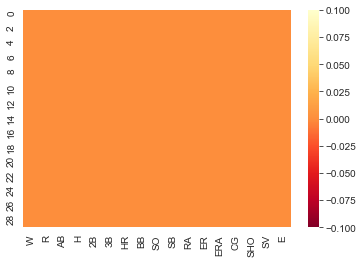

In [79]:
# Visualizing the null values using heatmap.

sns.heatmap(df_baseball.isnull(), cmap = 'YlOrRd_r')
plt.show()

From above, it's clear that there are no null values present in the dataset.

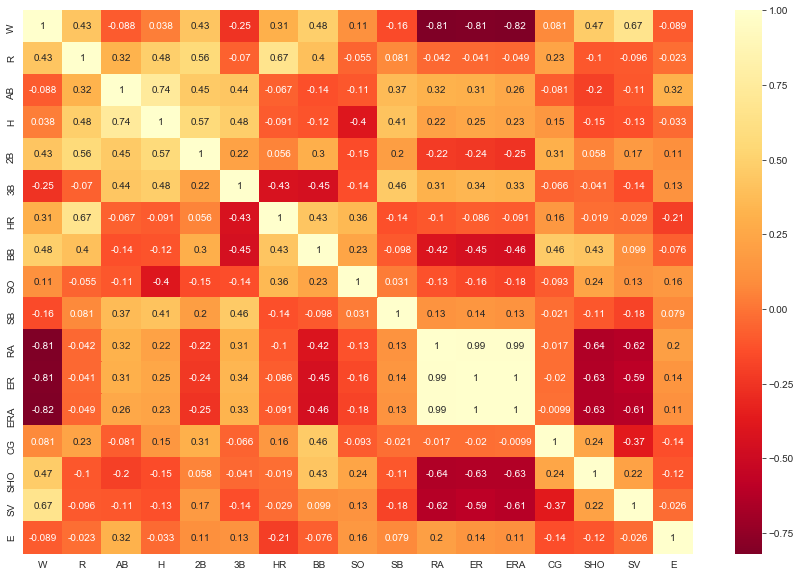

In [80]:
# Let's check the correlation using heatmap.

bbcorr = df_baseball.corr()
plt.figure(figsize=(15,10))
sns.heatmap(bbcorr,cmap = 'YlOrRd_r', annot = True)

OBSERVATIONS :
    
    1. Runs Allowed, Earned Runs and Earned Run Average are higly positively correlated with each other.
    2. Runs Allowed, Earned Runs and Earned Run Average are strongly negatively correlated with the target variable i.e. Wins.
    3. Shutouts and Saves are negatively ralted with Runs Allowed, Earned Runs and Earned Run Average.

In [81]:
# Lets check the skewness of dataset.

df_baseball.skew()

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

In [82]:
# Treating the skewness.

for col in df_baseball.columns:
    if df_baseball.skew().loc[col]>0.55:
        df_baseball[col]=np.log1p(df_baseball[col])

In [83]:
# Again checking the skewness after treament.

df_baseball.skew()

W      0.047089
R      0.744813
AB     0.183437
H      0.628584
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG    -0.325962
SHO   -0.589640
SV     0.163057
E      0.632916
dtype: float64

So, the skewed data has been normalised to it's possible extent. 

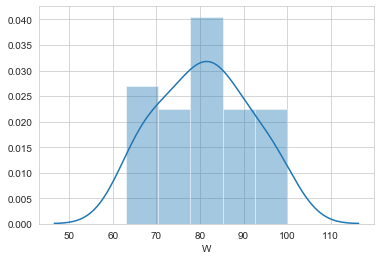

In [84]:
# Checking the distribution of skewness of Runs.

sns.distplot(df_baseball['W'])

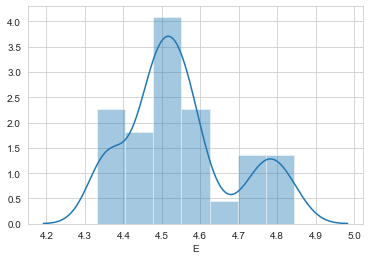

In [85]:
sns.distplot(df_baseball['E'])

In [86]:
df_baseball.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

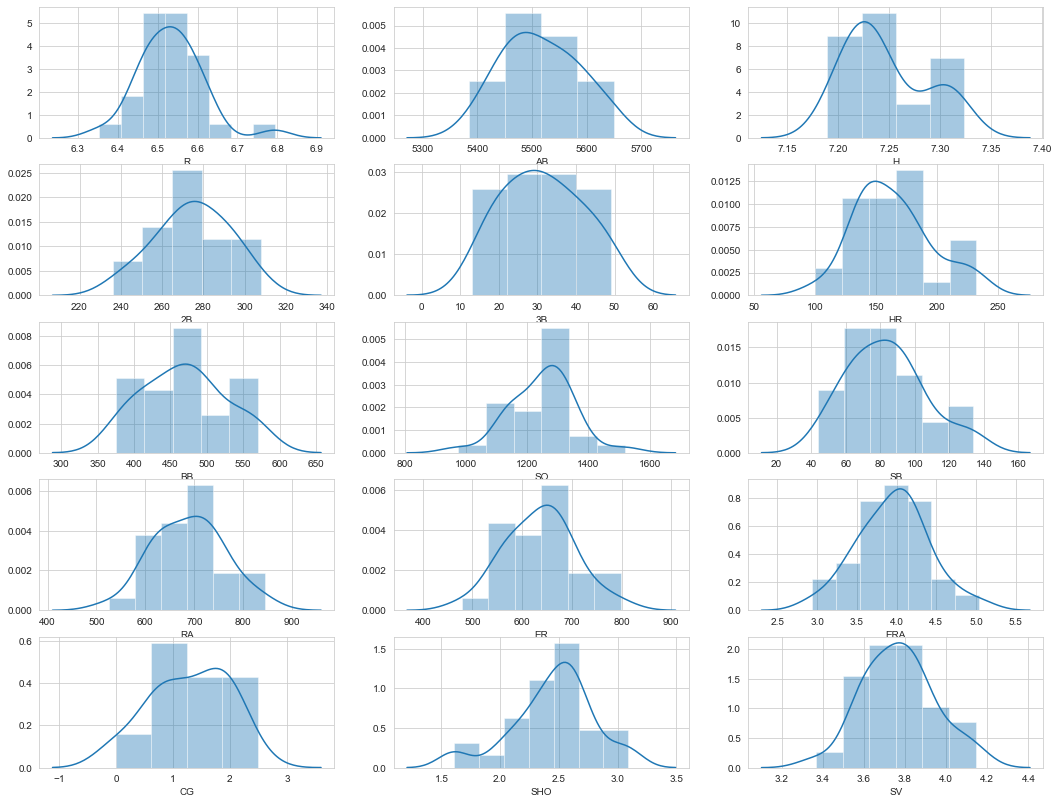

In [87]:
sns.set_style('whitegrid')
fig,ax = plt.subplots(5,3, figsize=(18,14))               
sns.distplot(df_baseball['R'], ax = ax[0,0])
sns.distplot(df_baseball['AB'], ax = ax[0,1])
sns.distplot(df_baseball['H'], ax = ax[0,2])
sns.distplot(df_baseball['2B'], ax = ax[1,0])
sns.distplot(df_baseball['3B'], ax = ax[1,1])
sns.distplot(df_baseball['HR'], ax = ax[1,2])
sns.distplot(df_baseball['BB'], ax = ax[2,0])
sns.distplot(df_baseball['SO'], ax = ax[2,1])
sns.distplot(df_baseball['SB'], ax = ax[2,2])
sns.distplot(df_baseball['RA'], ax = ax[3,0])
sns.distplot(df_baseball['ER'], ax = ax[3,1])
sns.distplot(df_baseball['ERA'], ax = ax[3,2])
sns.distplot(df_baseball['CG'], ax = ax[4,0])
sns.distplot(df_baseball['SHO'], ax = ax[4,1])
sns.distplot(df_baseball['SV'], ax = ax[4,2])
plt.show()

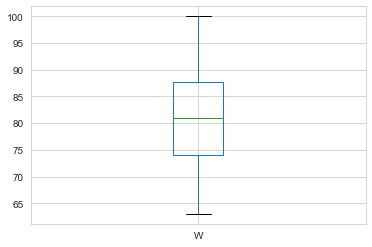

In [88]:
# Plotting the outliers

df_baseball['W'].plot.box()

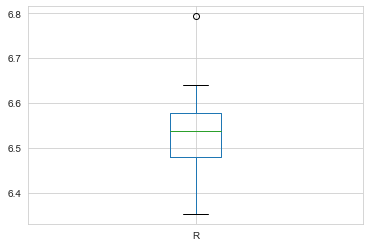

In [89]:
# Plotting the outliers

df_baseball['R'].plot.box()

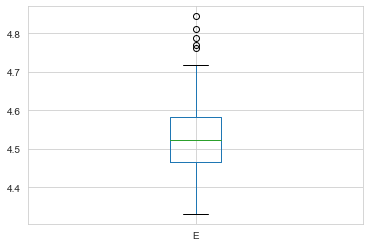

In [90]:
df_baseball['E'].plot.box()

In [91]:
collist = df_baseball.columns.values
ncol = 17
nrows = 30

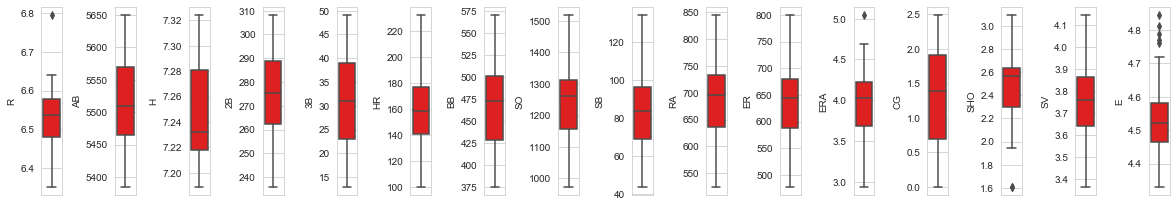

In [92]:
plt.figure(figsize=(ncol,5*ncol))
for i in range(1, len(collist)):
    plt.subplot(nrows, ncol, i+1)
    sns.boxplot(df_baseball[collist[i]],color = 'red', orient = 'v')
    plt.tight_layout()

In [93]:
# Let's now check the outliers and clean the data.
z = np.abs(zscore(df_baseball))
print(z.shape)
df_baseball = df_baseball.loc[(z<3).all(axis=1)]
print(df_baseball.shape)

(30, 17)
(29, 17)


By comparing shape of 'z' and 'df_baseball_final' shape , 1 row have been removed as an outlier.

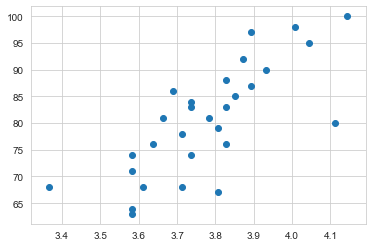

In [94]:
# relationship between Score value eoth the target variable.
plt.scatter(df_baseball['SV'],df_baseball['W'])

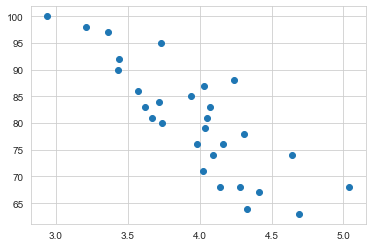

In [95]:
# relationship between Earned Run Average with the target variable.
plt.scatter(df_baseball['ERA'],df_baseball['W'])

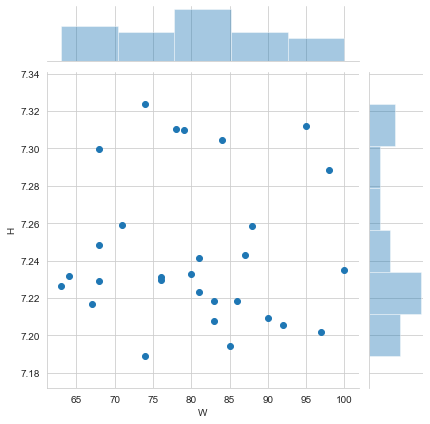

In [96]:
# relationship between homerun with the target variable.
sns.jointplot(x = 'W', y = 'H', data = df_baseball)

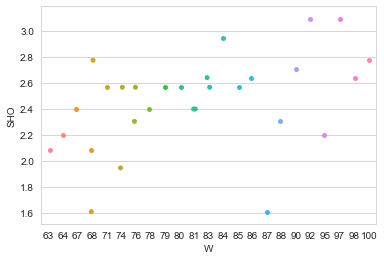

In [97]:
# relationship between shut out with the target variable.
sns.stripplot(x = 'W', y = 'SHO', data = df_baseball, jitter = True)

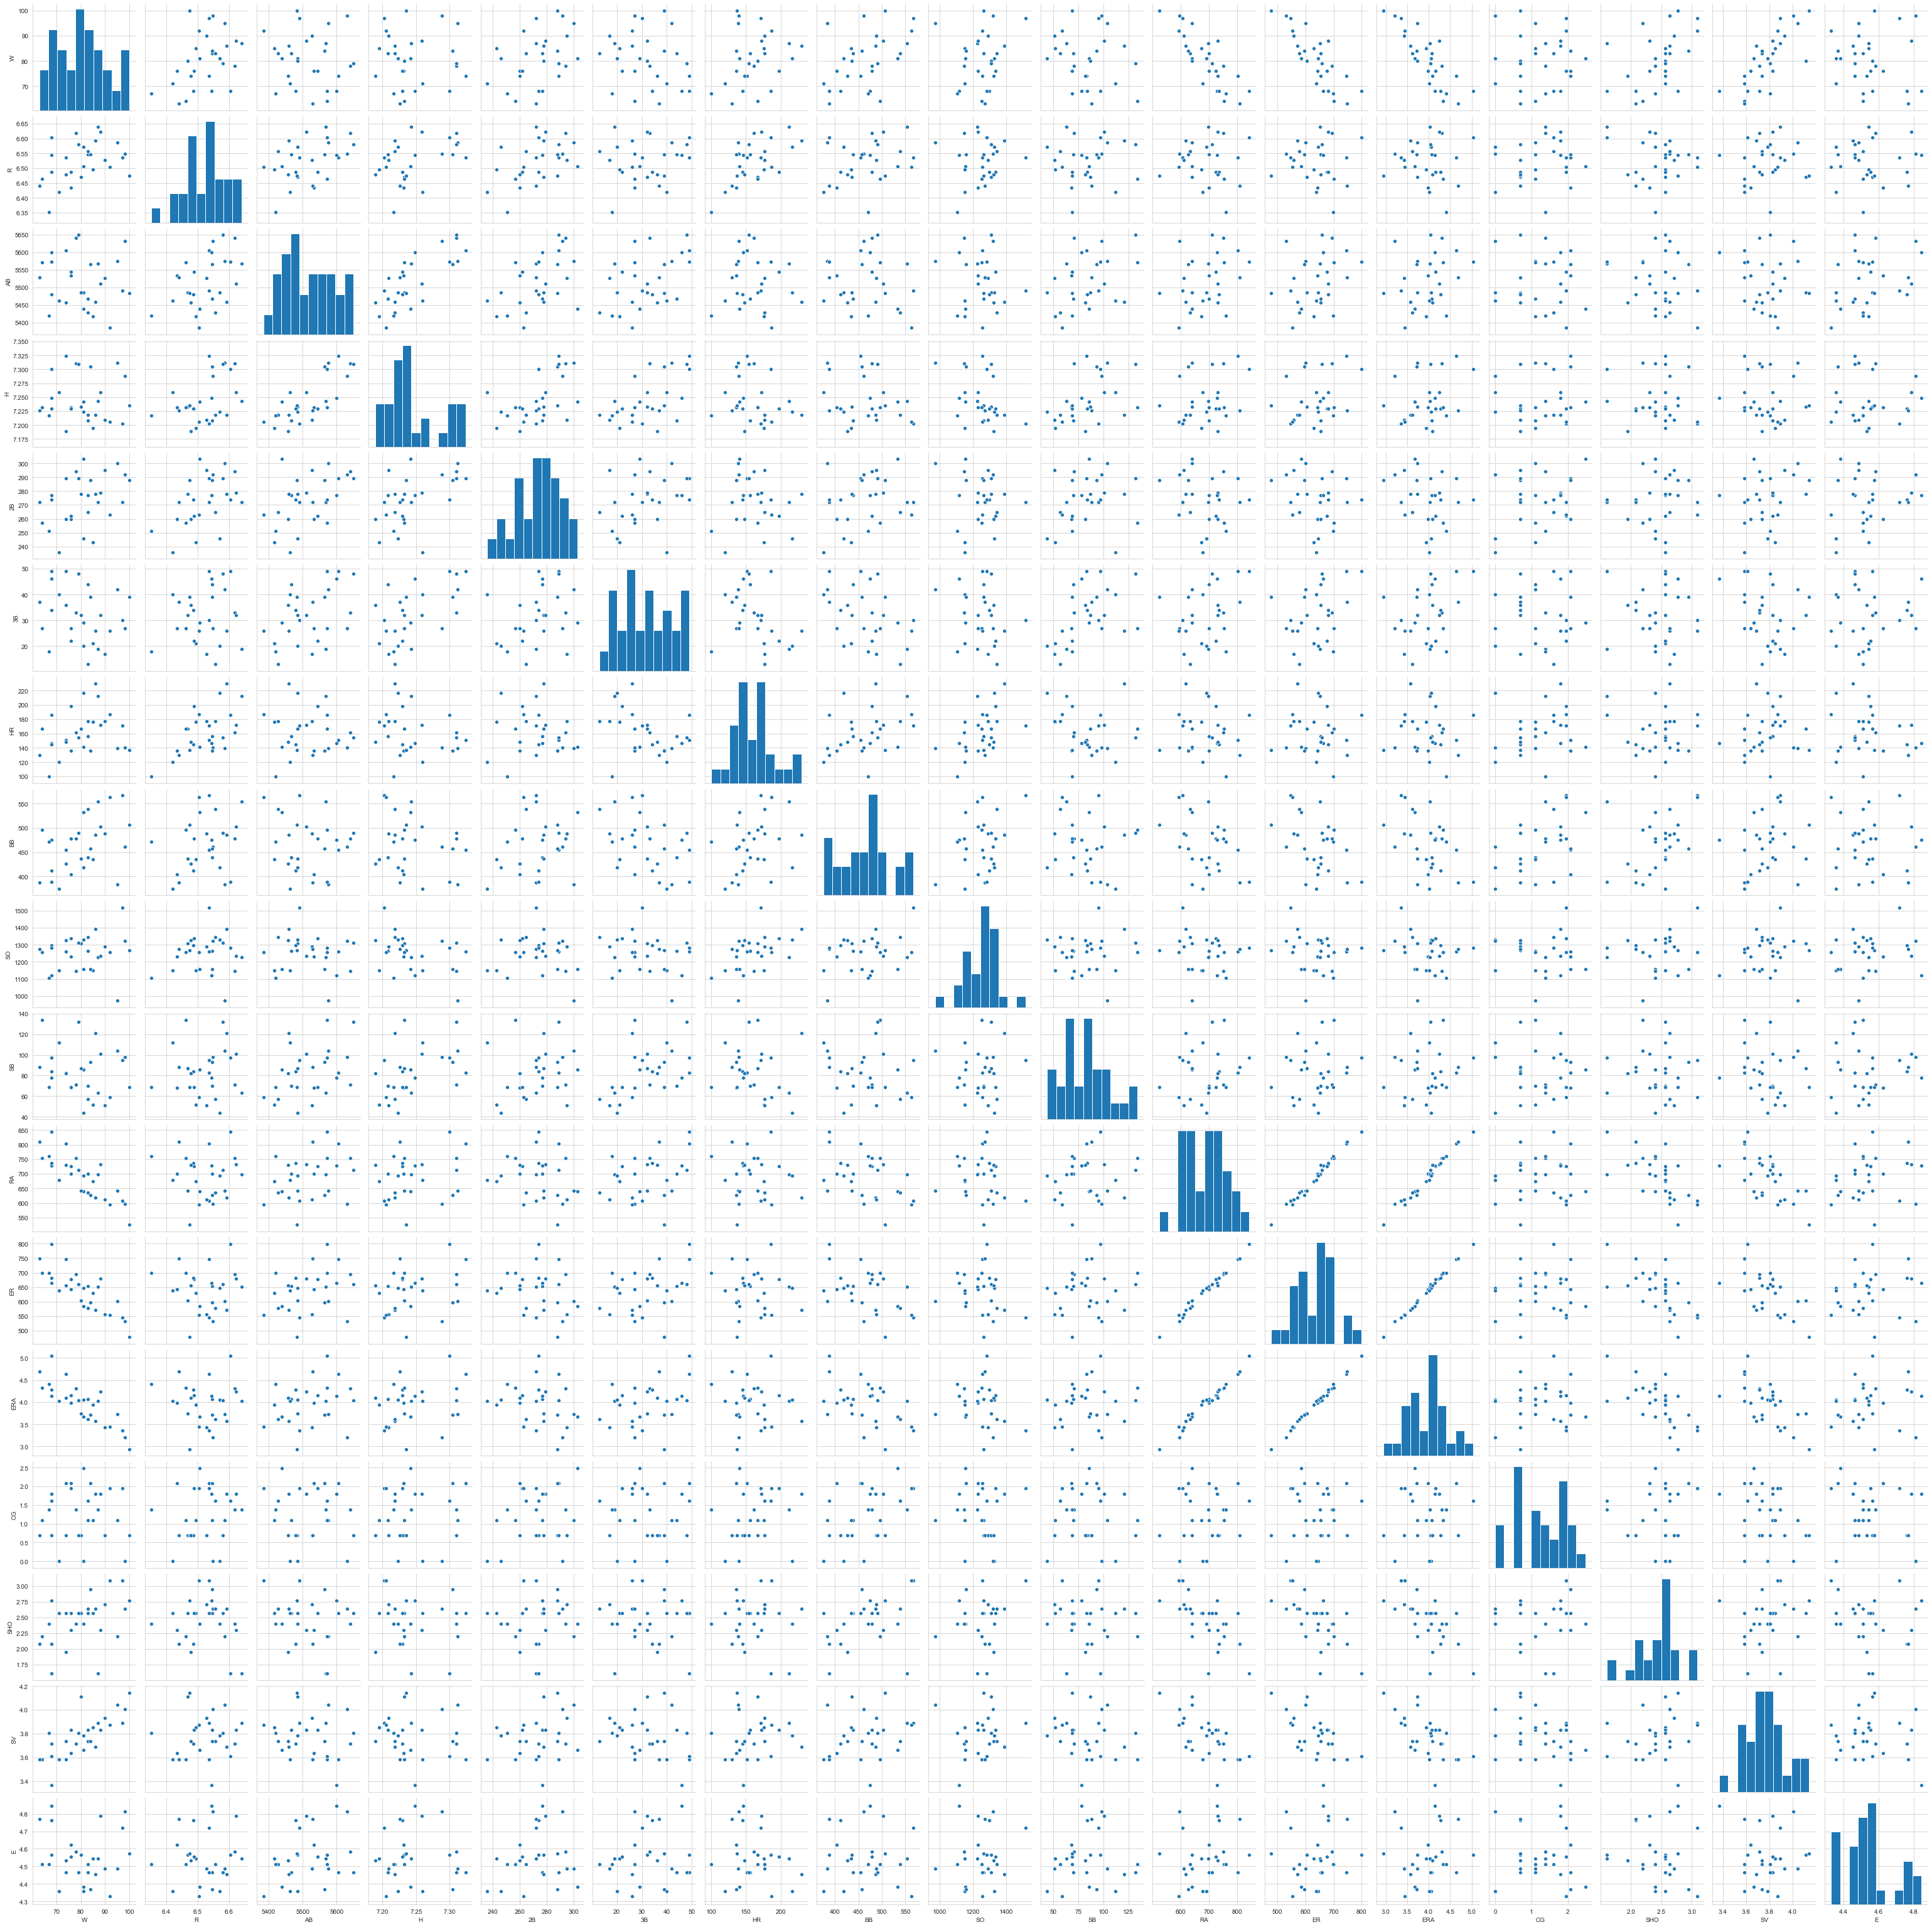

In [98]:
# Let's check the paiplot using seaborn library.

sns.pairplot(df_baseball)

In [99]:
# Let's separating the input and target variables

X = df_baseball.drop(columns=["W"])
y = df_baseball[["W"]]

In [100]:
print(X.shape)
print(y.shape)

(29, 16)
(29, 1)


In [101]:
X.head()

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,6.586172,5575,7.311886,300,42,139,383,973,104,641,601,3.73,1.098612,2.197225,4.043051,4.488636
1,6.546785,5467,7.207860,277,44,156,439,1264,70,700,653,4.07,1.098612,2.564949,3.828641,4.465908
2,6.507278,5439,7.241366,303,29,141,533,1157,86,640,584,3.67,2.484907,2.397895,3.663562,4.382027
3,6.434547,5533,7.231287,260,27,136,404,1231,68,701,643,3.98,2.079442,2.302585,3.637586,4.624973
4,6.536692,5605,7.323831,289,49,151,455,1259,83,803,746,4.64,2.079442,2.564949,3.583519,4.465908


In [102]:
y.head()

,W
0,95
1,83
2,81
3,76
4,74


In [103]:
# Scaling the Input variables

sc = StandardScaler()
X = sc.fit_transform(X)
X

array([[ 0.95271901,  0.83008422,  1.72372599,  1.55653766,  1.01084549,
        -0.76586314, -1.53635899, -2.72762331,  0.9059529 , -0.66451353,
        -0.51114812, -0.51138828, -0.24041455, -0.72241314,  1.55481209,
        -0.43573324],
       [ 0.35665907, -0.70283074, -0.94984589,  0.20117132,  1.20891656,
        -0.18138864, -0.49502051,  0.12189552, -0.58531515,  0.15463823,
         0.23216082,  0.23895226, -0.24041455,  0.31208451,  0.29622875,
        -0.59810993],
       [-0.24123892, -1.10025314, -0.08870013,  1.73332457, -0.2766165 ,
        -0.69710144,  1.25294051, -0.9258657 ,  0.11645805, -0.67839746,
        -0.75415297, -0.64380131,  1.81571095, -0.15787854, -0.67278738,
        -1.19738162],
       [-1.34193161,  0.23395062, -0.34774692, -0.8006212 , -0.47468758,
        -0.8690057 , -1.14585706, -0.20124579, -0.6730368 ,  0.16852216,
         0.08921679,  0.04033271,  1.21433279, -0.42600884, -0.82526317,
         0.53829069],
       [ 0.20390224,  1.25589393,  2

In [104]:
# Splitting the training and testing data and finding the maximum r2 score at random state.
def max_r2_score (reg, X, y):
    max_r_scr = 0
    for r_state in range(42,101):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20, random_state = r_state)
        reg.fit(X_train, y_train)
        pred = reg.predict(X_test)
        r2_scr = r2_score(y_test, pred)
        if r2_scr > max_r_scr:
            max_r_scr = r2_scr
            final_r_state = r_state
            
    print("Maximum r2 score corresponding to", final_r_state, "is :", max_r_scr)

In [105]:
# Linear Regression

lr = LinearRegression()
r_state = max_r2_score(lr, X, y)

Maximum r2 score corresponding to 73 is : 0.8454487972177378


In [106]:
# Cross validation with linear regression

print("Mean r2 score :", cross_val_score(lr, X, y, cv=5, scoring = "r2").mean())
print("Standard Deviationin r2 score :", cross_val_score(lr, X, y, cv=5, scoring = "r2").std())

Mean r2 score : -0.0355770780298915
Standard Deviationin r2 score : 0.6104439003422011


In [107]:
# Checking the lasso regression and finding the best alpha value.

from sklearn.linear_model import Lasso
lreg = Lasso()
parameters = {"alpha":[0.001,0.01,0.1,1]}
cl = GridSearchCV(lreg, parameters,cv=10)
cl.fit(X,y)
cl.best_params_

{'alpha': 1}

In [108]:
# Checking the max. r2  score with lasso regression

lreg = Lasso(alpha=1)
r_state = max_r2_score(lreg, X, y)

Maximum r2 score corresponding to 82 is : 0.9579431780402761


In [109]:
# Cross validation with lasso regression

print("Mean r2 score :", cross_val_score(lreg, X, y, cv=5, scoring = "r2").mean())
print("Standard Deviationin r2 score :", cross_val_score(lreg, X, y, cv=5, scoring = "r2").std())

Mean r2 score : 0.487875293481312
Standard Deviationin r2 score : 0.6061163928744148


In [111]:
# As lasso regression is giving the 0.95 r2 score at 82. So, finalizing the model.

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 82, test_size = 0.20)
lreg = Lasso()
lreg.fit(X_train, y_train)
y_pred = lreg.predict(X_test)

In [112]:
# Evaluating the r2 score and RMSE from the selcted model.

print("r2 score is : ",r2_score(y_test, y_pred))
print("RMSE is : ",np.sqrt(mean_squared_error(y_test, y_pred)))

r2 score is :  0.9579431780402761
RMSE is :  1.753849830610373


Thus, lasso regression is selcted as a final model for this dataset and saving the model.

In [114]:
# saving the model using joblib
from sklearn.externals import joblib

# Save the model as a pickle in a file
joblib.dump(lreg, 'lreg_baseBall.pkl')

['lreg_baseBall.pkl']